In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
wine = pd.read_csv('redwinequality.csv')
vino = pd.DataFrame()

In [40]:
print('amount of wines per quality\n',wine.value_counts('quality'))
print('amount of wines in data set\n', wine.describe())
print(wine.iloc[1])

amount of wines per quality
 quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64
amount of wines in data set
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996

In [8]:
def goodbad(a):
    if a>=6:
        out=1
    if a<6:
        out=0
    return out
wine['good/bad'] = wine['quality'].apply(goodbad)

In [41]:
vino['fixed acidity']= (wine['fixed acidity']-wine['fixed acidity'].mean())/wine['fixed acidity'].std()
vino['volatile acidity']= (wine['volatile acidity']-wine['volatile acidity'].mean())/wine['volatile acidity'].std()
vino['citric acid']= (wine['citric acid']-wine['citric acid'].mean())/wine['citric acid'].std()
vino['residual sugar']= (wine['residual sugar']-wine['residual sugar'].mean())/wine['residual sugar'].std()
vino['chlorides']= (wine['chlorides']-wine['chlorides'].mean())/wine['chlorides'].std()
vino['free sulfur dioxide']= (wine['free sulfur dioxide']-wine['free sulfur dioxide'].mean())/wine['fixed acidity'].std()
vino['total sulfur dioxide']= (wine['total sulfur dioxide']-wine['total sulfur dioxide'].mean())/wine['total sulfur dioxide'].std()
vino['total sulfur dioxide']= (wine['fixed acidity']-wine['fixed acidity'].mean())/wine['fixed acidity'].std()
vino['density']= (wine['density']-wine['density'].mean())/wine['density'].std()
vino['sulphates']= (wine['sulphates']-wine['sulphates'].mean())/wine['sulphates'].std()
vino['alcohol']= (wine['alcohol']-wine['alcohol'].mean())/wine['alcohol'].std()
vino['quality']= (wine['quality']-wine['quality'].mean())/wine['quality'].std()

In [42]:
random = vino.sample(1599, replace = False)
training_set = random.iloc[0:1065, :]
test_set = random.iloc[1065:, :]
x_train = training_set.iloc[:, 0:10].values
y_train = training_set.iloc[:, 10].values
y_train = np.reshape(y_train, (len(y_train), 1))
x_test = test_set.iloc[:, 0:10].values
y_test = test_set.iloc[:, 10].values
y_test = np.reshape(y_test, (len(y_test), 1))
x_train_trans = np.transpose(x_train)
x_train_Aug = np.vstack((np.ones((1,len(x_train))),x_train_trans))
x_test_trans = np.transpose(x_test)
x_test_Aug = np.vstack((np.ones((1,len(x_test))),x_test_trans))
theta = np.zeros((11,1))

In [43]:
no_of_iter = np.arange(1,100001)
alpha = 0.001
m_train = len(x_train)
m_test = len(x_test)

costfunc = []

#Iteration loop
for i in no_of_iter:
    z = np.transpose(theta)@x_train_Aug #Hypothesis function
    #print('z',z)
    cf = (1/(2*m_train))*(np.sum((np.transpose(z)-y_train)**2)) #Cost function
    #print('cf',cf)
    costfunc.append(cf) #Appending cost function
    #print('costfunc',costfunc)
    delthetaj = (1/m_train)*((x_train_Aug)@(np.transpose(z)-y_train)) #Derivative of cost function
    #print('delthetaj',delthetaj)
    theta = theta - (alpha*delthetaj) #Updating theta values
    #print('theta',theta)

In [44]:
#sample for input
wine.sample(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.9933,3.38,0.88,13.6,7


In [46]:
is_it_good_or_bad_wine()

User Input One:fixed acidity 7.4
User Input Two:volatile acidity .36
User Input Three:citric acid .34
User Input 4:residual sugar 1.8
User Input 5:chlorides .075
User Input 6:free sulfur dioxide18.0
User Input 7:total sulfur dioxide 38
User Input 8:density .9933
User Input 9:pH 3.38
User Input 10:sulphates .88
User Input 11:alcohol 13.6
Prediction value if wine is good or bad. [6.50796576]
This is a good wine.


In [45]:
#user input project
def is_it_good_or_bad_wine():
    u1 = (float(input("User Input One:fixed acidity "))-wine['fixed acidity'].mean())/wine['fixed acidity'].std()
    u2 = (float(input("User Input Two:volatile acidity "))-wine['volatile acidity'].mean())/wine['volatile acidity'].std()
    u3 = (float(input("User Input Three:citric acid "))-wine['citric acid'].mean())/wine['citric acid'].std()
    u4 = (float(input("User Input 4:residual sugar "))-wine['residual sugar'].mean())/wine['residual sugar'].std()
    u5 = (float(input("User Input 5:chlorides "))-wine['chlorides'].mean())/wine['chlorides'].std()
    u6 = (float(input("User Input 6:free sulfur dioxide"))-wine['free sulfur dioxide'].mean())/wine['free sulfur dioxide'].std()
    u7 = (float(input("User Input 7:total sulfur dioxide "))-wine['total sulfur dioxide'].mean())/wine['total sulfur dioxide'].std()
    u8 = (float(input("User Input 8:density "))-wine['density'].mean())/wine['density'].std()
    u9 = (float(input("User Input 9:pH "))-wine['pH'].mean())/wine['pH'].std()
    u10 = (float(input("User Input 10:sulphates "))-wine['sulphates'].mean())/wine['sulphates'].std()
    u11 = (float(input("User Input 11:alcohol "))-wine['alcohol'].mean())/wine['alcohol'].std()
    output= theta[0]*u1 + theta[1]*u2 + theta[2]*u3 + theta[3]*u4 + theta[4]*u5 + theta[5]*u6 + theta[6]*u7 + theta[7]*u8 + theta[8]*u9 + theta[9]*u10+ + theta[10]*u11
    gb=output*wine['quality'].std() + wine['quality'].mean()
    print('Prediction value if wine is good or bad.',gb)
    if gb>=.5:
        print('This is a good wine.')
    elif gb<.5:
        print('This is a bad wine.')

In [47]:
ran= np.random.randint(0,1598)
u1= (wine['fixed acidity'][ran]-wine['fixed acidity'].mean())/wine['fixed acidity'].std()
u2= (wine['volatile acidity'][ran]-wine['volatile acidity'].mean())/wine['volatile acidity'].std()
u3= (wine['citric acid'][ran]-wine['citric acid'].mean())/wine['citric acid'].std()
u4= (wine['residual sugar'][ran]-wine['residual sugar'].mean())/wine['residual sugar'].std()
u5= (wine['chlorides'][ran]-wine['chlorides'].mean())/wine['chlorides'].std()
u6= (wine['free sulfur dioxide'][ran]-wine['free sulfur dioxide'].mean())/wine['fixed acidity'].std()
u7= (wine['total sulfur dioxide'][ran]-wine['total sulfur dioxide'].mean())/wine['total sulfur dioxide'].std()
u8= (wine['fixed acidity'][ran]-wine['fixed acidity'].mean())/wine['fixed acidity'].std()
u9= (wine['density'][ran]-wine['density'].mean())/wine['density'].std()
u10= (wine['sulphates'][ran]-wine['sulphates'].mean())/wine['sulphates'].std()
u11= (wine['alcohol'][ran]-wine['alcohol'].mean())/wine['alcohol'].std()
print('output_expected',wine['quality'][ran])
output= theta[0]*u1 + theta[1]*u2 + theta[2]*u3 + theta[3]*u4 + theta[4]*u5 + theta[5]*u6 + theta[6]*u7 + theta[7]*u8 + theta[8]*u9 + theta[9]*u10+ + theta[10]*u11
print('output predicted', output*wine['quality'].std() + wine['quality'].mean())
gb=output*wine['quality'].std() + wine['quality'].mean()
print('Prediction value if wine is good or bad.',gb)
if gb>=6:
    print('This is a good wine.')
elif gb<5:
    print('This is a bad wine.')

output_expected 6
output predicted [5.91217634]
Prediction value if wine is good or bad. [5.91217634]


In [48]:
times= np.arange(0,10000)
diff= []

for a in times:
    ran= np.random.randint(0,1598)
    u1= (wine['fixed acidity'][ran]-wine['fixed acidity'].mean())/wine['fixed acidity'].std()
    u2= (wine['volatile acidity'][ran]-wine['volatile acidity'].mean())/wine['volatile acidity'].std()
    u3= (wine['citric acid'][ran]-wine['citric acid'].mean())/wine['citric acid'].std()
    u4= (wine['residual sugar'][ran]-wine['residual sugar'].mean())/wine['residual sugar'].std()
    u5= (wine['chlorides'][ran]-wine['chlorides'].mean())/wine['chlorides'].std()
    u6= (wine['free sulfur dioxide'][ran]-wine['free sulfur dioxide'].mean())/wine['fixed acidity'].std()
    u7= (wine['total sulfur dioxide'][ran]-wine['total sulfur dioxide'].mean())/wine['total sulfur dioxide'].std()
    u8= (wine['fixed acidity'][ran]-wine['fixed acidity'].mean())/wine['fixed acidity'].std()
    u9= (wine['density'][ran]-wine['density'].mean())/wine['density'].std()
    u10= (wine['sulphates'][ran]-wine['sulphates'].mean())/wine['sulphates'].std()
    u11= (wine['alcohol'][ran]-wine['alcohol'].mean())/wine['alcohol'].std()
    output_expected=wine['quality'][ran]
    output= theta[0]*u1 + theta[1]*u2 + theta[2]*u3 + theta[3]*u4 + theta[4]*u5 + theta[5]*u6 + theta[6]*u7 + theta[7]*u8 + theta[8]*u9 + theta[9]*u10+ + theta[10]*u11
    
    subtract= output_expected-(output*wine['quality'].std() + wine['quality'].mean())
    
    diff.append(float(subtract))

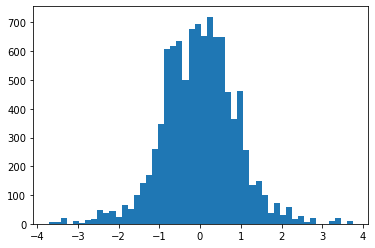

In [49]:
plt.hist(diff, bins=50)
plt.show()